In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
from os import sys
sys.path.append("/meshAfterParty/meshAfterParty/")
import datajoint as dj
import datajoint_utils as du

minnie,schema = du.configure_minnie_vm()
m65mat = du.m65mat

INFO - 2021-05-03 23:31:28,835 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-03 23:31:28,837 - settings - Setting database.user to celiib
INFO - 2021-05-03 23:31:28,838 - settings - Setting database.password to newceliipass
INFO - 2021-05-03 23:31:28,848 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-03 23:31:29,314 - settings - Setting enable_python_native_blobs to True


In [4]:
import allen_utils as alu
from annotationframeworkclient import FrameworkClient
client = alu.configure_client()

In [12]:
client.annotation.get_tables()

https://minnie.microns-daf.com/annotation/api/v2/aligned_volume/minnie65_phase3/table


['functional_coreg',
 'proofreading_functional_coreg_v2',
 'proofreading_functional_coreg',
 'nucleus_detection_v0',
 'allen_v1_column_thalamic',
 'my_new_table2',
 'l5_mc_cg',
 'allen_v1_column_pyc_proof',
 'allen_v1_column_types_v3',
 'allen_v1_column_types_slanted',
 'allen_v1_column_types',
 'synapses_pni_1M',
 'synapses_pni_2',
 'nucleus_neuron_svm',
 'allen_v1_column_types_v2',
 'allen_v1_column_proofreading']

# Pulling Down the Table with the current proof status

In [31]:
current_table = "proofreading_functional_coreg_v2"
#current_table = "allen_v1_column_proofreading"
current_table = "allen_v1_column_pyc_proof" # only has whether the dendrite wa cleaned
client.materialize.get_annotation_count(current_table)
proof_df = client.materialize.query_table(current_table,
                                         #filter_in_dict=dict(pre_pt_root_id=[864691135994684074])
                                         )
proof_df

230

In [ ]:
"""
The proofread segments were not stored anywhere in the 
database but instead were on the spreadsheet 
szi-chieh shared with  me:

https://docs.google.com/spreadsheets/d/1lbLtQegeG7UPzGOmYE-lliPqTBldC9BP-JSzrWi8Ybo/edit?pli=1#gid=0

"""


# Loading in the Proofread Cells Spreadsheet

In [49]:
import pandas as pd
proof_pd = pd.read_csv('./Minnie65 core proofreading_5_3.csv', header=1)
status_df = proof_pd[["Nucleus ID","Date_Seeded","Finished_Den","Finished_Ax"]]


In [61]:
#status_df.query("(Finished_Den == True) & (Finished_Ax.isnull())",engine='python')
man_proof_nuc_ids = status_df.query("(Date_Seeded.isnull()) & (Finished_Den == True) & (Finished_Ax == 'TRUE')",engine='python')["Nucleus ID"].to_numpy()
man_proof_nuc_ids

array([296726., 294545., 225498., 335175., 258307., 271518., 269380.,
       331945., 300763., 230236., 264870., 327859., 262773., 330079.,
       301095., 301189., 330326., 269247., 332199., 236197., 559381.,
       533187., 564808., 489675., 493419., 525758., 493968., 518898.,
       556823., 531202., 522656., 518848., 487512., 460053., 557121.,
       557030., 525498., 559081., 460391., 493885., 493806., 520364.,
       525405., 588983., 560732., 588839., 560217., 560109., 562808.,
       582129., 553325., 582056., 554921., 610498., 554741., 583848.,
       583961., 582210., 560530., 585723., 558709., 526226., 554200.,
       518853., 558684., 516758., 517056., 554833., 581967., 524491.,
       587426., 616159., 553283., 554891., 580826., 612143., 612352.,
       518623., 520027., 553321., 553407., 580988., 583891., 516621.,
       518224., 580948., 612266.])

# Want to now relate these Nucleus Ids to Segment IDs

In [62]:
man_proof_nuc_ids

array([296726., 294545., 225498., 335175., 258307., 271518., 269380.,
       331945., 300763., 230236., 264870., 327859., 262773., 330079.,
       301095., 301189., 330326., 269247., 332199., 236197., 559381.,
       533187., 564808., 489675., 493419., 525758., 493968., 518898.,
       556823., 531202., 522656., 518848., 487512., 460053., 557121.,
       557030., 525498., 559081., 460391., 493885., 493806., 520364.,
       525405., 588983., 560732., 588839., 560217., 560109., 562808.,
       582129., 553325., 582056., 554921., 610498., 554741., 583848.,
       583961., 582210., 560530., 585723., 558709., 526226., 554200.,
       518853., 558684., 516758., 517056., 554833., 581967., 524491.,
       587426., 616159., 553283., 554891., 580826., 612143., 612352.,
       518623., 520027., 553321., 553407., 580988., 583891., 516621.,
       518224., 580948., 612266.])

In [ ]:
current_table = "nucleus_detection_v0"
nuc_df = client.materialize.query_table('current_table',
                                       filter_equal_dict={'cell_type':'neuron'},
                                       filter_out_dict={'pt_root_id':[0]})

In [72]:
nuc_table = du.configure_nucleus_table(version = 82)

In [74]:
man_proof_seg_ids = (nuc_table & [dict(nucleus_id=k) for k in man_proof_nuc_ids]).fetch("segment_id")
man_proof_seg_ids

array([864691135753932237, 864691135609687047, 864691136903144370,
       864691135293126156, 864691136023889209, 864691136951664863,
       864691135462463389, 864691135974639471, 864691136108768952,
       864691135517422218, 864691136194248918, 864691136116205476,
       864691135446675028, 864691136011067043, 864691136008689326,
       864691135564752471, 864691136378815445, 864691135953898760,
       864691137019596142, 864691135367058169, 864691135617953423,
       864691135508879113, 864691135272206865, 864691135440543560,
       864691135865773189, 864691136023980601, 864691136084313196,
       864691135117980637, 864691135508871945, 864691136309871706,
       864691135884023664, 864691136084302956, 864691136118618136,
       864691134884807418, 864691135415666362, 864691135583884664,
       864691136209258172, 864691135776732256, 864691135385422677,
       864691135609594119, 864691136811995507, 864691135233242713,
       864691135367033849, 864691135775906989, 864691136573079

In [75]:
training_seg_id = minnie.AutoProofreadValidationSegmentMap.fetch("segment_id")
np.intersect1d(man_proof_seg_ids,training_seg_id)

array([864691134884807418, 864691135117980637, 864691135233242713,
       864691135272206865, 864691135293126156, 864691135334584297,
       864691135337845734, 864691135358985048, 864691135367058169,
       864691135385422677, 864691135415666362, 864691135440543560,
       864691135446675028, 864691135462420637, 864691135462463389,
       864691135497743635, 864691135508879113, 864691135517422218,
       864691135517531786, 864691135564739159, 864691135564752471,
       864691135583884664, 864691135593659947, 864691135617953423,
       864691135700409211, 864691135718541617, 864691135724393131,
       864691135761634358, 864691135761725238, 864691135775906989,
       864691135776732256, 864691135782544435, 864691135809608652,
       864691135815579983, 864691135848030814, 864691135865773189,
       864691135915343462, 864691135937286404, 864691135953898760,
       864691135975539779, 864691135975633475, 864691136023889209,
       864691136108768952, 864691136116205476, 864691136194248

## Turning the Segment IDs into the Synapse Spreadsheets

In [77]:
client.materialize._version 

82

In [79]:
nuc_df = client.materialize.query_table('nucleus_neuron_svm',
                                       filter_equal_dict={'cell_type':'neuron'},
                                       filter_out_dict={'pt_root_id':[0]})
nuc_df

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,485509,t,is_neuron,neuron,103588564537113366,864691136740606812,"[282608, 103808, 20318]"
1,113721,t,is_neuron,neuron,79951332685465031,864691135366988025,"[110208, 153664, 23546]"
2,263203,t,is_neuron,neuron,87694643458256575,864691135181741826,"[166512, 174176, 24523]"
3,456177,t,is_neuron,neuron,102677963354799688,864691135337690598,"[275616, 135120, 24873]"
4,364447,t,is_neuron,neuron,94449079618306553,864691136883828334,"[216064, 166800, 15025]"
...,...,...,...,...,...,...,...
82239,390522,t,is_neuron,neuron,97749195318464441,864691135939301377,"[239920, 112864, 17348]"
82240,329229,t,is_neuron,neuron,92547130727975969,864691135740183915,"[202176, 151760, 15660]"
82241,190153,t,is_neuron,neuron,84663632759322436,864691135169731390,"[144752, 135472, 18599]"
82242,256280,t,is_neuron,neuron,87546415009833381,864691136266562036,"[165808, 118256, 20198]"


In [101]:
ex_1 = nuc_df[nuc_df["pt_root_id"] == 864691136436509342]
ex_1

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
13222,560217,t,is_neuron,neuron,107892602468387948,864691136436509342,"[313472, 189904, 17692]"


In [82]:
aug_nuc_df = alu.aug_nuc_df

In [102]:
ex_2 = aug_nuc_df[aug_nuc_df["flat_nuc_id"] == 560217]
ex_2

,cleft_segid,size,centroid_x,centroid_y,centroid_z,bbox_bx,bbox_by,bbox_bz,bbox_ex,bbox_ey,bbox_ez,flat_nuc_id,svid,root_id
141958,560217,2814951,19592,11869,17692,19512,11788,17565,19673,11952,17816,560217,107892602468387948,864691136134446219


In [111]:
new_df = pd.merge(ex_1,ex_2,left_on="id",right_on="flat_nuc_id",how='inner')

In [108]:
overlap[overlap["id"] == 560217]

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position,cleft_segid,size,centroid_x,...,centroid_z,bbox_bx,bbox_by,bbox_bz,bbox_ex,bbox_ey,bbox_ez,flat_nuc_id,svid,root_id
13222,560217,t,is_neuron,neuron,107892602468387948,864691136436509342,"[313472, 189904, 17692]",560217,2814951,19592,...,17692,19512,11788,17565,19673,11952,17816,560217,107892602468387948,864691136134446219


In [99]:
overlap = pd.merge(nuc_df, aug_nuc_df, left_on='id', right_on='flat_nuc_id', how='inner')
overlap_df = overlap.query('pt_root_id==root_id')

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position,cleft_segid,size,centroid_x,...,centroid_z,bbox_bx,bbox_by,bbox_bz,bbox_ex,bbox_ey,bbox_ez,flat_nuc_id,svid,root_id


In [120]:
x = 864691136436509342
overlap.query(f"pt_root_id=={s}")["root_id"].to_list()

[864691136134446219]

# New Way to Get Synapses

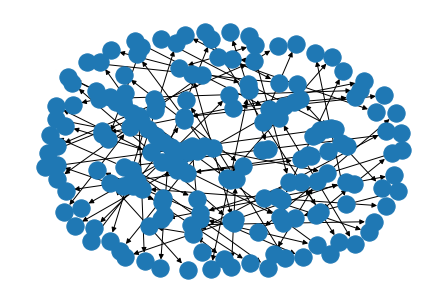

In [161]:
"""
Pseudocode: 
Using a segment Id from August
1) get all of the leaves of the segment id (during a current timestamp)
2) Query the synapse table based on those ids to get all of the 
synapse ids
3) Concatenate the synapse ids into one table
"""
import pandas as pd
import networkx_utils as xu

root_id = 864691136134446219
curr_time = datetime.datetime(2020, 8, 1, 1, 0, 0)

DiG = alu.seg_id_to_nx_lineage_graph(root_id=root_id,
                               timestamp_past = curr_time,
                               timestamp_future = None,#curr_time,
                              client=None)

In [178]:
"""
Get the edges of the graph

"""
import numpy_utils as nu

end_nodes = xu.end_nodes_of_digraph(DiG,verbose = True)
end_nodes_timestamps = xu.get_node_attributes(DiG,"timestamp",node_list=end_nodes)
last_datetime_edited = nu.float_to_datetime(np.max(end_nodes_timestamps))
print(f"last_datetime_edited = {last_datetime_edited}")

# of end nodes = 73
last_datetime_edited = 2020-09-24 20:49:32.183000


# Turn the end nodes into synapse

In [179]:
end_nodes

array([864691135194481962, 864691135538168690, 864691136333863347,
       864691135809565132, 864691135502122421, 864691135915287142,
       864691136175120390, 864691135754731474, 864691135873663886,
       864691135657900162, 864691136175129606, 864691135988426240,
       864691136486862098, 864691135654187714, 864691135730272185,
       864691136422886191, 864691136388323959, 864691135776713824,
       864691135994604970, 864691135117907933, 864691135476214440,
       864691135753797069, 864691136273718797, 864691135162339885,
       864691135754731730, 864691135337837286, 864691135386473857,
       864691135407345609, 864691136370856840, 864691136108861368,
       864691136175130374, 864691135113217945, 864691136328954858,
       864691136740512348, 864691135570886893, 864691135799814498,
       864691135162337069, 864691135771770187, 864691135925585678,
       864691135501634370, 864691135915287654, 864691136065339544,
       864691136672726919, 864691136088996919, 864691135697425

In [187]:
df_pre = client.materialize.query_table('synapses_pni_2',
                                           filter_in_dict={'pre_pt_root_id':end_nodes})
df_post = client.materialize.query_table('synapses_pni_2',
                                           filter_in_dict={'post_pt_root_id':end_nodes})
df_post

,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position
0,408491449,t,109371239583706523,864691135469400260,109371239583701097,864691136436509342,15112,"[324236, 196458, 18869]","[324240, 196390, 18870]","[324242, 196424, 18866]"
1,392515752,t,108103983646118046,864691135716142996,108103983646130341,864691136436509342,15084,"[315102, 191870, 18344]","[315068, 191918, 18353]","[315146, 191913, 18351]"
2,400264450,t,108807396277018572,864691136765611886,108807396277019937,864691136436509342,7172,"[320164, 189858, 18775]","[320096, 189882, 18776]","[320102, 189880, 18775]"
3,391325064,t,108170091715711287,864691136764424814,108170091782227115,864691136436509342,16340,"[315664, 160192, 17912]","[315740, 160128, 17923]","[315680, 160198, 17917]"
4,385412009,t,107821958846280525,864691135875998803,107821958846277097,864691136436509342,3488,"[313056, 187650, 17691]","[313184, 187740, 17697]","[313112, 187688, 17692]"
...,...,...,...,...,...,...,...,...,...,...
8364,373795961,t,106480966843048306,864691135531417074,106480966843055770,864691136436509342,45556,"[303266, 157960, 16641]","[303204, 158040, 16639]","[303110, 158035, 16635]"
8365,374575330,t,106696677616099674,864691135734009748,106696677616101015,864691136436509342,2104,"[304728, 192322, 19252]","[304764, 192374, 19254]","[304734, 192358, 19254]"
8366,408084919,t,109161714100341738,864691135957217994,109232082844516508,864691136436509342,2156,"[323104, 208520, 20318]","[323140, 208562, 20311]","[323096, 208568, 20314]"
8367,380478516,t,107323742572515865,864691135403749565,107323673853096755,864691136436509342,31136,"[309416, 145658, 16900]","[309466, 145566, 16910]","[309472, 145636, 16905]"


In [ ]:
# Want to  

In [180]:
ann_metadata = client.annotation.get_table_metadata(client.info.get_datastack_info()["synapse_table"])
ann_metadata

{'table_name': 'synapses_pni_2',
 'valid': True,
 'id': 36,
 'deleted': None,
 'description': 'Automated synapse detection performed by Nick Turner from the Seung Lab.  size represents the number of (4x4x40 nm) voxels painted by the automated cleft segmentation, and the IDs reference the IDs of the cleft segmentation.  Ctr_pt reflects the centroid of the cleft segmentation. The cleft segmentation volume is located in the flat_segmentation_source field. ',
 'flat_segmentation_source': None,
 'schema_type': 'synapse',
 'created': '2020-11-04T06:48:36.953637',
 'user_id': 'foo@bar.com',
 'reference_table': None}

In [184]:
import system_utils as su
ex_df = su.load_object("./Syanpse_dfs/864691134988386682.pkl")
ex_df

,id,valid,pre_pt_position,pre_pt_supervoxel_id,pre_pt_root_id,ctr_pt_position,post_pt_position,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_root_id_Aug,post_pt_root_id_Aug
0,92770509,True,"[137036, 220554, 23068]",83619509633613772,864691136925486410,"[137072, 220518, 23064]","[137136, 220586, 23072]",83619509633620146,864691135558675908,4508.0,8.646911e+17,8.646911e+17
1,92295389,True,"[137958, 224872, 23504]",83760796878321067,864691136925486410,"[137952, 224888, 23507]","[137912, 224910, 23508]",83760796878324723,864691135367338994,3488.0,8.646911e+17,8.646911e+17
2,107051621,True,"[143000, 205778, 23818]",84461941766293729,864691136925486410,"[142996, 205726, 23819]","[142930, 205708, 23827]",84461941766303990,864691135545878152,2576.0,8.646911e+17,8.646911e+17
3,107051674,True,"[143004, 205774, 23811]",84461941766293729,864691136925486410,"[143066, 205736, 23814]","[143098, 205756, 23812]",84461941766291497,864691136390364031,3252.0,8.646911e+17,8.646911e+17
4,113298846,True,"[147356, 246832, 20291]",85030388808167240,864691135946711649,"[147420, 246842, 20296]","[147398, 246870, 20290]",85030388808165948,864691135360177735,2192.0,8.646911e+17,8.646911e+17
...,...,...,...,...,...,...,...,...,...,...,...,...
230,169643736,True,"[183640, 217206, 20692]",90022583982096732,864691135468692978,"[183630, 217282, 20692]","[183608, 217358, 20692]",90022652701568715,864691135278269857,2632.0,8.646911e+17,8.646911e+17
231,166967052,True,"[183464, 217458, 20771]",90022652701653980,864691136859404910,"[183524, 217480, 20766]","[183500, 217472, 20759]",90022652701636980,864691135278269857,9304.0,8.646911e+17,8.646911e+17
232,166967074,True,"[183488, 217516, 20753]",90022652701630247,864691135458881266,"[183536, 217520, 20758]","[183562, 217448, 20759]",90022652701639810,864691135278269857,288.0,8.646911e+17,8.646911e+17
233,167580965,True,"[183624, 239076, 23522]",90025539255461313,864691135454145010,"[183558, 239132, 23518]","[183512, 239068, 23512]",90025539255456955,864691136008528556,1204.0,8.646911e+17,8.646911e+17


In [126]:
import time
import datetime
import tqdm.notebook as tqdm
def get_input_output_df(aug_seg_id,  n_chunks=50, timestamp=datetime.datetime(2020, 8, 1, 1, 0, 0),
                       verbose = True,):
    st = time.time()
    
    svids=client.chunkedgraph.get_leaves(aug_seg_id)
    chunks = np.array_split(svids,n_chunks)
    #need to break the supervoxels up into chunks to query
    out_syn_dfs=[]
    for chunk in tqdm.tqdm(chunks):
        dft = client.materialize.query_table('synapses_pni_2',
                                           filter_in_dict={'pre_pt_supervoxel_id':chunk})
        out_syn_dfs.append(dft)
    out_syn_df = pd.concat(out_syn_dfs)
    out_syn_df['pre_pt_root_id_Aug']=aug_seg_id
    post_sv_ids=out_syn_df.post_pt_supervoxel_id.values
    post_root_ids_aug = client.chunkedgraph.get_roots(post_sv_ids, timestamp=august_timestamp)
    out_syn_df['post_pt_root_id_Aug']=post_root_ids_aug
    #  now the same for inputs
    in_syn_dfs=[]
    for chunk in tqdm.tqdm(chunks):
        dft = client.materialize.query_table('synapses_pni_2',
                                           filter_in_dict={'post_pt_supervoxel_id':chunk})
        in_syn_dfs.append(dft)
    in_syn_df = pd.concat(in_syn_dfs)
    in_syn_df['post_pt_root_id_Aug']=aug_seg_id
    pre_sv_ids=in_syn_df.pre_pt_supervoxel_id.values
    pre_root_ids_aug = client.chunkedgraph.get_roots(pre_sv_ids, timestamp=timestamp)
    in_syn_df['pre_pt_root_id_Aug']=pre_root_ids_aug
    
    if verbose:
        print(f"Total time for synapse table of segment {aug_seg_id} = {time.time() - st}")
    return pd.concat([out_syn_df, in_syn_df])

In [127]:
ret_df = get_input_output_df(864691136134446219)

  0%|          | 0/50 [00:00<?, ?it/s]

HTTPError: 504 Server Error: Gateway Time-out for url: https://minnie.microns-daf.com/materialize/api/v2/datastack/minnie65_phase3_v1/version/82/table/synapses_pni_2/query?return_pyarrow=True&split_positions=False content:b'<html>\r\n<head><title>504 Gateway Time-out</title></head>\r\n<body>\r\n<center><h1>504 Gateway Time-out</h1></center>\r\n<hr><center>nginx</center>\r\n</body>\r\n</html>\r\n'

In [ ]:
@schema
class AutoProofreadValidationSegmentExclude(dj.Manual):
    definition="""
    segment_id           : bigint unsigned               # segments that were not finished proofreading
    """
AutoProofreadValidationSegmentExclude.insert((dj.U("segment_id") & (old_rel & [{'nucleus_id': n} for n in exclude])).fetch(as_dict=True),skip_duplicates=True)
AutoProofreadValidationSegmentExclude()

# Creating the Table with the valid synapses

In [ ]:
minnie.AutoProofreadValidationManualSynapseUpdated

In [ ]:
m65mat.ProofreadSynapse.describe()

In [ ]:
"""
Purpose: To Create a table that has the 
valid synpases for the proofread targets
that can be used to restrict the set determined in the synapse spreadsheet

Pseudocode: 

"""

@schema
class AutoProofreadValidationManualSynapseUpdated(dj.Manual):
    definition="""
    -> m65mat.Materialization
    synapse_id           : bigint unsigned              # synapse index within the segmentation
    presyn               : bigint unsigned              # segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.
    postsyn              : bigint unsigned              # segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.
    ---
    synapse_x            : int unsigned                 # x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.
    synapse_y            : int unsigned                 # y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.
    synapse_z            : int unsigned                 # z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.
    synapse_size         : int unsigned                 # (EM voxels) scaled by (4x4x40)
    """

In [ ]:
presyn_table = m65mat.ProofreadSynapse & subfinal.proj(presyn='segment_id')
presyn_data = presyn_table.proj("synapse_x","synapse_y","synapse_z","synapse_size").fetch(as_dict=True)
AutoProofreadValidationManualSynapseUpdated.insert(presyn_data,skip_duplicates=True)

In [ ]:
postsyn_table = m65mat.ProofreadSynapse & subfinal.proj(postsyn='segment_id')
postsyn_data = postsyn_table.proj("synapse_x","synapse_y","synapse_z","synapse_size").fetch(as_dict=True)
AutoProofreadValidationManualSynapseUpdated.insert(postsyn_data,skip_duplicates=True)

In [ ]:
minnie.AutoProofreadValidationManualSynapseUpdated()